## pca와 LDA차이
* pca는 입력 데이터의 변동성이 가장 큰 축, 공분산행렬 => 비지도학습
* LDA는 클래스간 분산은 최대한 크게, 내부 분산은 최대한 작게 -> 고유벡터 구함 =>지도학습의 분류에 사용하기 쉽다(labeling)

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
# 정규분포로 스케일링 필요
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)



Bad key "axes_unicode_minus" on line 3 in
/home/jovyan/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


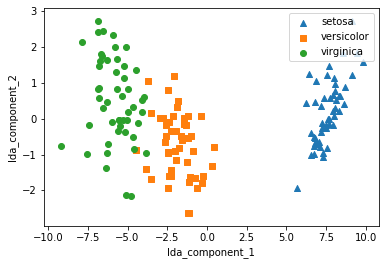

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

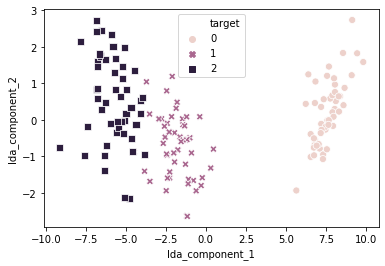

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [6, 4] # setting figure size
sns.scatterplot(x='lda_component_1', 
                y='lda_component_2', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=irisDF_lda)
plt.show()

In [9]:
# pca적용하기 전 스케일링(pca압축하기 전 각 속성값 동일한 스케일로 변환)
from sklearn.preprocessing import StandardScaler
#df = pd.DataFrame(iris.data, columns=columns)
iris_scaled = StandardScaler().fit_transform(iris_lda)
iris_scaled.shape

(150, 2)

In [12]:
lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target
irisDF_lda.head()

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


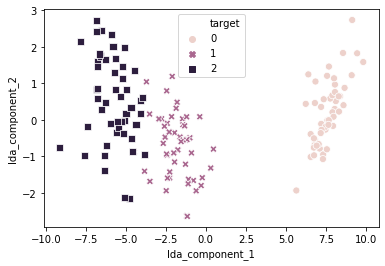

In [13]:
plt.rcParams['figure.figsize'] = [6, 4] # setting figure size #plt.figure(figsize = (14,14))
sns.scatterplot(x='lda_component_1', 
                y='lda_component_2', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=irisDF_lda)
plt.show()

In [14]:
print(lda.explained_variance_ratio_)
# 변동성

[0.9912126 0.0087874]


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf=RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3) # 3번 교차 sk폴드 결과 3개 리턴
print(scores)

[0.98039216 0.92156863 0.97916667]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
lda_X = irisDF_lda[['lda_component_1', 'lda_component_2']]
scores_lda = cross_val_score(rcf, lda_X, iris.target, scoring='accuracy', cv=3)
print(scores_lda)

[1.         0.94117647 1.        ]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
